<div class="description user_content student-version enhanced"><h2>Problem Overview</h2>
<p>The goal of this exercise is to find line segments using the Hough transform, and then identify sets of parallel lines in the scene. For example, in the image below, two sets of parallel line segments are identified; one set is red and the other is green (there is also a very small set of blue lines).</p>
<p><img src="https://elearning.mines.edu/courses/25410/files/2394973/download" alt="chess_lines.png" width="549" height="375" style="max-width: 549px;"></p>
<h2>Hough Transform</h2>
<p>As described in the Hough tutorial, OpenCV has several functions to compute the Hough transform. For this lab, use the function “cv2.HoughLinesP()”, which implements the probabilistic Hough Transform. This is a more efficient implementation of the Hough transform, and returns a set of line segments, where each line segment is represented by its endpoints (x1, y1, x2, y2). You can call this function using:</p>

<pre><code><em># Run Hough transform.&nbsp; The output houghLines has size (N,1,4), where N is #lines.<br># The 3rd dimension has the line segment endpoints: x0,y0,x1,y1.<br></em>houghLines = cv2.HoughLinesP(<br>&nbsp;&nbsp;&nbsp; image=Iedges,<br>&nbsp;&nbsp;&nbsp; rho=1,<br>&nbsp;&nbsp;&nbsp; theta=math.pi/180,<br>&nbsp;&nbsp;&nbsp; threshold=int(image_width * MIN_HOUGH_VOTES_FRACTION),<br>&nbsp;&nbsp;&nbsp; lines=None,<br>&nbsp;&nbsp;&nbsp; minLineLength=int(image_width * MIN_LINE_LENGTH_FRACTION),<br>&nbsp;&nbsp;&nbsp; maxLineGap=10)<br>print(<strong>"Found %d line segments" </strong>% len(houghLines))</code></pre>

<p>The function takes as input a binary edge produced by the Canny edge detector. The constant MIN_HOUGH_VOTES_FRACTION is multiplied by the image width to determine the Hough accumulator threshold. Only those lines are returned that get enough votes (i.e., greater than the threshold). The constant MIN_LINE_LENGTH_FRACTION is multiplied by the image width to determine the minimum line length that is detected.</p>
    
<p>To display the line segments, use the following code:</p>
    
<pre><code><em># For visualizing the lines, draw on a grayscale version of the image.<br></em>bgr_display = cv2.cvtColor(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)<br>for i in range(0, len(houghLines)):<br>&nbsp;&nbsp;&nbsp; l = houghLines[i][0]<br>&nbsp;&nbsp;&nbsp; cv2.line(bgr_display, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; thickness=2, lineType=cv2.LINE_AA)<br>&nbsp;&nbsp;&nbsp; cv2.imshow(<strong>"Hough linesP"</strong>, bgr_display)</code></pre>
    
<h2>Vanishing Points</h2>
<p>As described in the Szeliski textbook (Section 4.3.3), a “vanishing point” is a point in the image where lines that are parallel in 3D, appear to meet at infinity. See the railroad tracks image below.</p>
    
<p><img src="https://elearning.mines.edu/courses/25410/files/2394970/download" alt="railroad.jpg" width="543" height="357" style="max-width: 543px;"></p>
<p>The vanishing point is actually the image projection of a point on one of these parallel lines, infinitely far away. The vanishing point doesn’t have to fall within the image. Instead of specifying the vanishing point as an image point, we can specify the 3D direction to the point.</p>
<p>The function “find_vanishing_point_directions()” in the Python file <span class="instructure_file_holder link_holder"><a class="instructure_file_link" title="vanishing.py" href="https://elearning.mines.edu/courses/25410/files/2394968/download?download_frd=1" data-api-endpoint="https://elearning.mines.edu/api/v1/courses/25410/files/2394968" data-api-returntype="File">vanishing.py</a> finds vanishing points in an image, and returns their direction vectors. It takes as input the line segments from the Hough transform function. The algorithm is described in the post <a href="https://yichaozhou.com/post/20190402vanishingpoint/" class="external" target="_blank" rel="noreferrer noopener"><span>https://yichaozhou.com/post/20190402vanishingpoint/</span></a>.&nbsp; You can use these directions to reconstruct the orientation of the camera, as described in the Szeliski textbook (Section 6.3.2).</p>

<h2>To Do</h2>
<p>A set of test images is on the course website:&nbsp; <a class="instructure_file_link instructure_image_thumbnail" title="corridor1.jpg" href="https://elearning.mines.edu/courses/25410/files/2394962/download?wrap=1" data-api-endpoint="https://elearning.mines.edu/api/v1/courses/25410/files/2394962" data-api-returntype="File">corridor1.jpg</a>, <a class="instructure_file_link instructure_image_thumbnail" title="corridor2.jpg" href="https://elearning.mines.edu/courses/25410/files/2394965/download?wrap=1" data-api-endpoint="https://elearning.mines.edu/api/v1/courses/25410/files/2394965" data-api-returntype="File">corridor2.jpg</a>, <a class="instructure_file_link instructure_image_thumbnail" title="corridor3.png" href="https://elearning.mines.edu/courses/25410/files/2394966/download?wrap=1" data-api-endpoint="https://elearning.mines.edu/api/v1/courses/25410/files/2394966" data-api-returntype="File">corridor3.png</a>. Process these images and find three sets of parallel line segments.</p>

<h2>Upload</h2>
<ul>
<li>Your Python program.</li>
<li>The overlay images for the three test images.</li>
</ul></div>

In [161]:
from IPython.display import Javascript
import os
import cv2
import numpy as np
from glob import glob

from IPython.display import display, HTML
import ipywidgets as widgets  # Using the ipython notebook widgets
import IPython

# Use 'jpeg' instead of 'png' (~5 times faster)
import PIL.Image
from io import BytesIO


def imdisplay(img, fmt='jpeg', width=500):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_p = PIL.Image.fromarray(img)
    f = BytesIO()
    if new_p.mode != 'RGB':
        new_p = new_p.convert('RGB')
    new_p.save(f, fmt)
    return IPython.display.Image(data=f.getvalue(), width=width)


def preventScrolling():
    disable_js = """
    IPython.OutputArea.prototype._should_scroll = function(lines) {
        return false;
    }
    """
    display(Javascript(disable_js))


preventScrolling()

# display(imdisplay(img_annotation2.astype(np.uint8), width=400))

<IPython.core.display.Javascript object>

## vanishing.py

In [208]:
import cv2
import numpy as np
import math
# Find vanishing point directions.
# Inputs:
#   houghLines:  An array of size (N,1,4), which is the output of cv2.HoughLinesP
#   bgr_img:  The original input image (in blue-green-red format)
#   num_to_find:  The desired number of vanishing points to find
#   K:  The camera matrix (if known)
# Outputs:
#   vanishing_directions: A list of num_to_find vectors, each 3 dimensional


def find_vanishing_point_directions(houghLines, bgr_img, num_to_find=3, K=None):
    global PRINTER
    assert(houghLines.shape[1] == 1)
    assert(houghLines.shape[2] == 4)
    vanishing_directions = []


    display_colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0),
                      (255, 0, 255), (0, 255, 255), (255, 255, 0)]
    thickness = int(bgr_img.shape[1]/250)
    if thickness < 1: thickness = 1
    # Find each vanishing point in turn.
    for n in range(num_to_find):
        d, contributing_lines = find_vanishing_pt(houghLines, bgr_img)
        if d is not None and PRINTER:
            print("Found a vanishing point with direction vector: ", d)
            print("Number of contributing lines: ", np.sum(contributing_lines))
        
        # Show contributing line segments.
        for i in range(0, len(houghLines)):
            try:
                if contributing_lines[i]:

                    l = houghLines[i][0]
                    cv2.line(bgr_img, (l[0], l[1]), (l[2], l[3]),
                             display_colors[n], thickness=thickness, lineType=cv2.LINE_AA)
            except:
                pass
#         cv2.imshow("Contributing line segments", bgr_display)
#         cv2.waitKey(0)

        # Eliminate contributing lines and repeat.
        houghLines = houghLines[contributing_lines == False]
#     display(imdisplay(bgr_display.astype(np.uint8), width=400))
    return bgr_img


# This function uses RANSAC to find a set of line segments that fit a single vanishing point.
# See this post:  https://yichaozhou.com/post/20190402vanishingpoint/
def find_vanishing_pt(houghLines, bgr_img, K=None):
    best_vanishing_direction = None
    contributing_lines = []

    if K is None:
        # Estimate a camera matrix.
        image_width = bgr_img.shape[1]
        image_height = bgr_img.shape[0]
        f = image_width
        cx = image_width / 2
        cy = image_height / 2
        K = np.array([[f, 0, cx], [0, f, cy], [0, 0, 1]], dtype=np.double)
    Kinv = np.linalg.inv(K)

    num_lines = len(houghLines)
    if num_lines < 2:       # Need at least two lines
        return best_vanishing_direction, contributing_lines

    # Compute normals for each line segment.
    normals = np.ones((num_lines, 3))
    for i in range(num_lines):
        l = houghLines[i][0]
        e1 = Kinv @ np.array([l[0], l[1], 1])
        e2 = Kinv @ np.array([l[2], l[3], 1])
        v = np.cross(e1, e2)
        normals[i, :] = v / np.linalg.norm(v)

    NUM_ITERATIONS = 3000
    INLIER_THRESH = 0.03        # Maximum value of dot product
    best_num_inliers = 0

    for i in range(NUM_ITERATIONS):
        # Randomly pick two lines.
        i1 = np.random.randint(0, num_lines)
        i2 = np.random.randint(0, num_lines)
        if i1 == i2:
            continue
        n1 = normals[i1]
        n2 = normals[i2]

        # Get the 3D line direction vector.
        d = np.cross(n1, n2)
        m = np.linalg.norm(d)
        if m < 1e-6:
            continue    # The two lines are colinear in the image; skip them
        d = d / np.linalg.norm(d)

        # Ok, count how many lines are consistent with direction d.
        # A line is consistent if its norm is perpendicular to d.
        residual_errors = np.zeros(num_lines)
        for j in range(num_lines):
            n = normals[j]
            residual_errors[j] = abs(np.dot(n, d))
        num_inliers = np.sum(residual_errors < INLIER_THRESH)
        if num_inliers > best_num_inliers:
            best_num_inliers = num_inliers
            best_vanishing_direction = d
            contributing_lines = residual_errors < INLIER_THRESH

    return best_vanishing_direction, contributing_lines

def resize(img, scale=60):
    global PRINTER
    if scale > 1:
        scale_percent = scale/100
    else:
        scale_percent = scale
    width = int(img.shape[1] * scale_percent)
    height = int(img.shape[0] * scale_percent)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

    if PRINTER: print('Resized Dimensions : ', resized.shape[:2])
    return resized

def find_scaling(img, target_width=400):
    return target_width/img.shape[1]

1. Read the image and convert it to gray scale. As suggested in the Hough tutorial, reduce its size if it is large, and <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html">blur it slightly to reduce noise</a>.

2. Call the <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html">Canny Edge Detector</a> to create an edge image. As suggested in the Hough tutorial, adjust the threshold to obtain a desired number of edges. For this lab, I recommend between 5% and 8% edge density (i.e., MIN_FRACT_EDGES = 0.05, MAX_FRACT_EDGES = 0.08).

3. Call <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html">“HoughLinesP”</a> to find line segments from the edge image. You will have to experiment with the constants MIN_HOUGH_VOTES_FRACTION and MIN_LINE_LENGTH_FRACTION.

4. Call “find_vanishing_point_directions()”, to produce an image with red, green and blue overlay segments, such as shown in the chess image above. The program should find what appears to be three orthogonal sets of line segments.

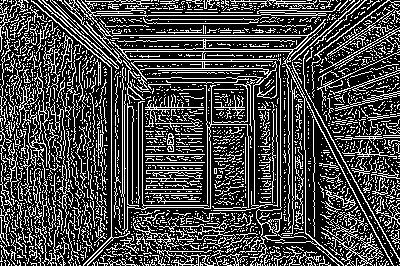

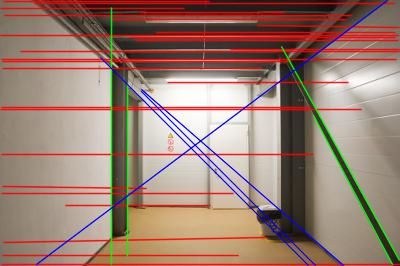

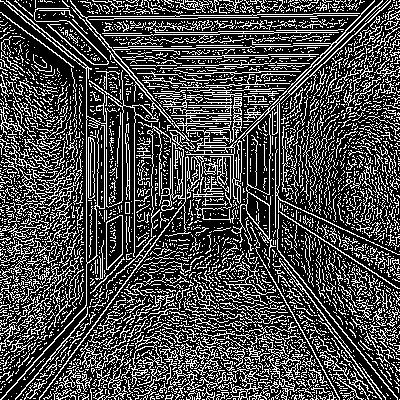

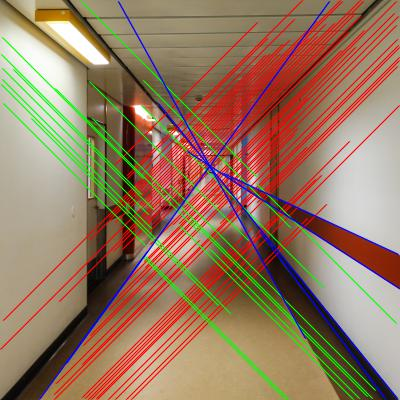

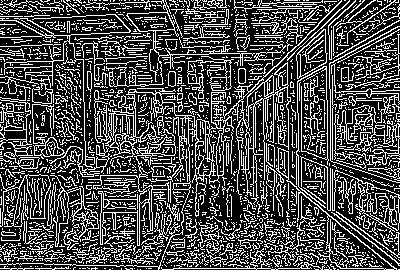

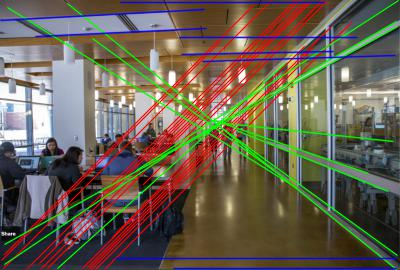

In [235]:
"""SETTINGS"""
MIN_FRACT_EDGES = 0.15
MAX_FRACT_EDGES = 0.25
MIN_HOUGH_VOTES_FRACTION = 0.375
MIN_LINE_LENGTH_FRACTION = 0.35
PRINTER = False
DISPLAY_EDGE_IMG = True

"""FILES"""
files = glob("./corridor*.*")

"""MAIN"""
for photo in files:
    display(HTML(f'''<h1>{photo}</h1>'''))
    img  = cv2.imread(photo)
    img = resize(img, find_scaling(img, target_width=400))
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(5,5),0.5)
    edges = cv2.Canny(blur, MIN_FRACT_EDGES, MAX_FRACT_EDGES)
    if DISPLAY_EDGE_IMG: display(imdisplay(edges.astype(np.uint8), width=400))
    houghLines = cv2.HoughLinesP(
        image=edges,
        rho=1,
        theta=math.pi/180,
        threshold=int(img.shape[1] * MIN_HOUGH_VOTES_FRACTION),
        lines=None,
        minLineLength=int(img.shape[1] * MIN_LINE_LENGTH_FRACTION),
        maxLineGap=10)
    if PRINTER: print("Found %d line segments" % len(houghLines))
    lines_img = find_vanishing_point_directions(houghLines, img, num_to_find=3, K=None)
    display(imdisplay(lines_img.astype(np.uint8), width=400))
    